#Credit Card Transaction Classification (Fraudulent or Legitimate)

##Importing Libraries and Loading Dataset

In [ ]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import r_regression, SelectPercentile
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score, log_loss

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#the path should be the same for all of us
dt_path = '/content/drive/MyDrive/CreditCardDataset/fraudTrain.csv'
df = pd.read_csv(dt_path)

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


##Exploratory Data Analysis and Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
df.shape

(1296675, 23)

In [ ]:
#Checking the types
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
#Checking the null values
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
#checking for duplicates
duplicates=df[df.duplicated()]
if duplicates.empty:
  print('No duplicates found')
else:
  print('Duplicates found')
  print(duplicates)

No duplicates found


In [ ]:
df.columns
#some of the columns, especially of type obj (names and etc) are not really useful, so we will drop them

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.select_dtypes(include = ['object']).nunique()
#categorical columns with too many unique values will be dropped too

trans_date_trans_time    1274791
merchant                     693
category                      14
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
job                          494
dob                          968
trans_num                1296675
dtype: int64

In [ ]:
df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'dob', 'trans_num', 'unix_time'], inplace = True)
#getting rid of time-dependency here

In [ ]:
#checking for the duplicates after dropping the time col
duplicates=df[df.duplicated()]
if duplicates.empty:
  print('No duplicates found')
else:
  print('Duplicates found')
  print(duplicates)
#suprising but no duplicates

No duplicates found


In [ ]:
df.tail(15)

,merchant,category,amt,gender,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
1296660,fraud_Cartwright PLC,kids_pets,49.93,M,58769,48.3396,-102.2400,229,Administrator,48.724332,-102.379390,0
1296661,fraud_Lynch-Wisozk,home,77.83,M,15923,40.3673,-79.1605,1770,"Administrator, local government",40.372477,-79.115942,0
1296662,"fraud_Lubowitz, Terry and Stracke",personal_care,157.69,F,24970,37.7418,-80.4626,4575,Statistician,37.918700,-80.800598,0
1296663,"fraud_Witting, Beer and Ernser",home,84.10,F,65066,38.3511,-91.4867,6703,Naval architect,39.193343,-91.016642,0
1296664,"fraud_Larkin, Stracke and Greenfelder",entertainment,69.38,F,5733,43.8065,-73.0882,5895,"Scientist, marine",43.808957,-72.277168,0
1296665,fraud_Gulgowski LLC,home,72.17,M,49775,45.7549,-84.4470,95,Electrical engineer,44.938461,-83.996234,0
1296666,"fraud_Hyatt, Russel and Gleichner",health_fitness,7.30,F,60958,41.0646,-87.5917,2135,"Psychotherapist, child",40.556811,-88.092339,0
1296667,"fraud_Hahn, Douglas and Schowalter",travel,19.71,M,33844,28.0758,-81.5929,33804,Exercise physiologist,27.465871,-81.511804,0
1296668,"fraud_Metz, Russel and Metz",kids_pets,100.85,F,39073,32.1530,-90.1217,19685,Fine artist,31.377697,-90.528450,0
1296669,fraud_Stiedemann Inc,misc_pos,37.38,F,68859,41.4972,-98.7858,509,"Nurse, children's",41.728638,-99.039660,0


In [ ]:
# Plotting a heatmap
df_num_cols = df.select_dtypes(include=['float64', 'int64'])

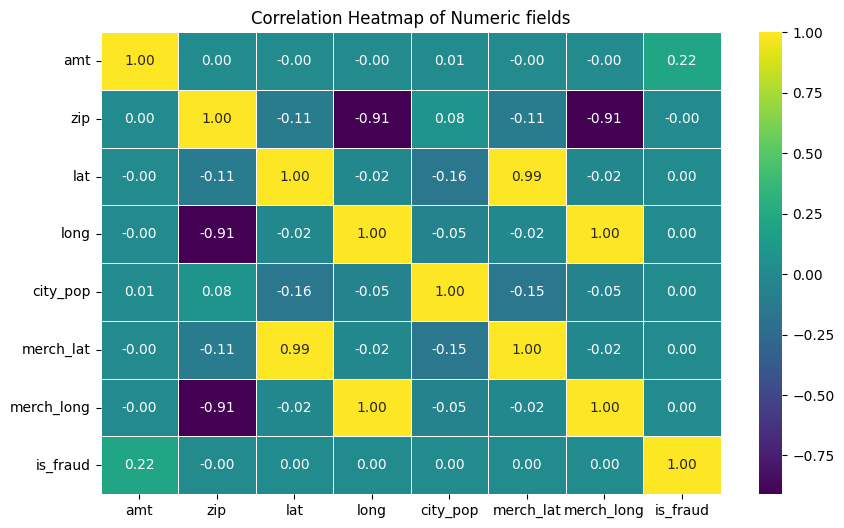

In [ ]:
correlation_matrix = df_num_cols.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric fields')
plt.show()
#as it turns out "long" and "merch_long" as well as "lat" and "merch_lat" are giving us the same info, have to drop one for each
#in addition, there is a very high negative correlation between zip and both of the mentioned cols

In [ ]:
df.drop(columns=['long', 'lat'], inplace = True)

In [ ]:
fraud_correlation = correlation_matrix['is_fraud'].abs().sort_values(ascending=False)
print(fraud_correlation)

is_fraud      1.000000
amt           0.219404
zip           0.002162
city_pop      0.002136
lat           0.001894
merch_lat     0.001741
merch_long    0.001721
long          0.001721
Name: is_fraud, dtype: float64


In [ ]:
fraud_trans_count = (df['is_fraud'] == 1).sum()
valid_trans_count = (df['is_fraud'] == 0).sum()

print("Number of fraud transactions:", fraud_trans_count)
print("Number of valid transactions:", valid_trans_count)

Number of fraud transactions: 7506
Number of valid transactions: 1289169


In [ ]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

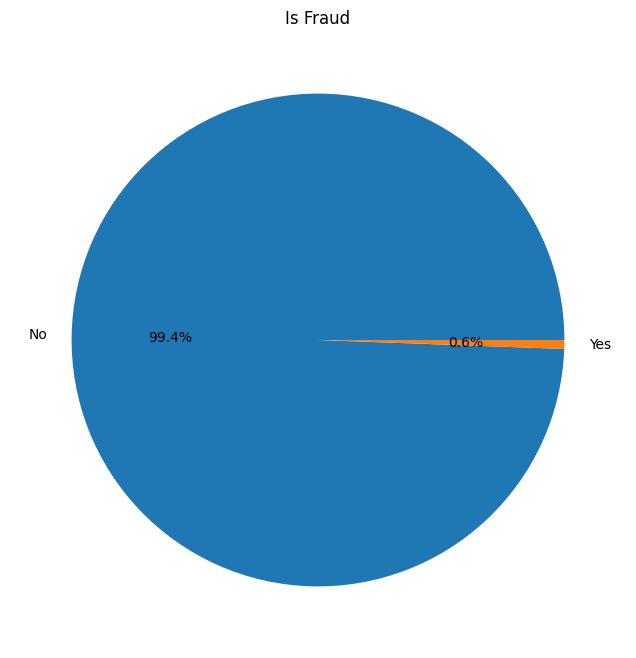

In [ ]:
#Proportion of fraudulent-non-fraudulent transactions
plt.figure(figsize = (10, 6))
is_fraud_count = df['is_fraud'].value_counts()
plt.figure(figsize = (12, 8))
plt.pie(is_fraud_count, labels = ['No', 'Yes'], autopct="%0.1f%%")
plt.title('Is Fraud')
plt.show()
#Conclusion: highly imbalanced, have to do some resampling

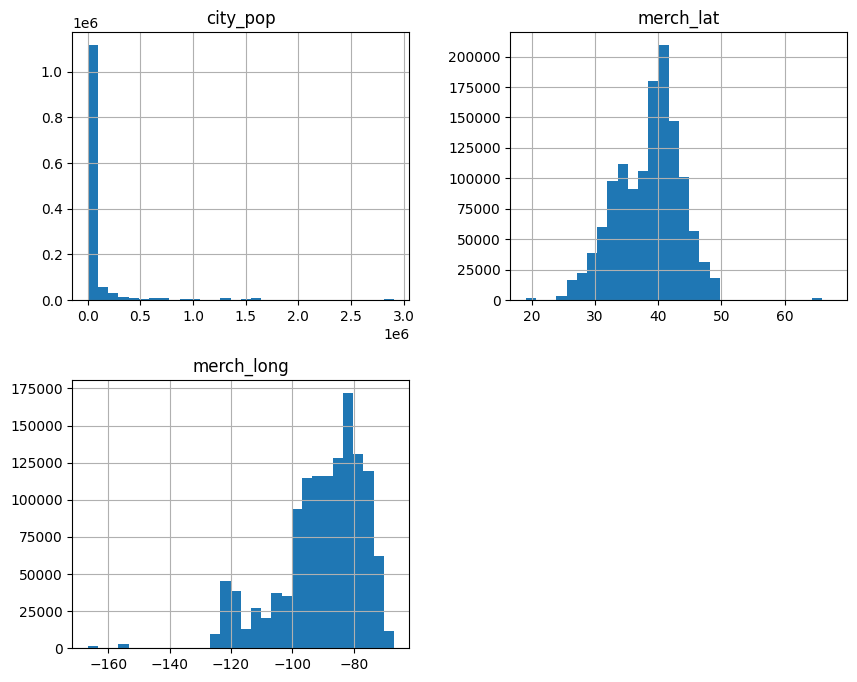

In [ ]:
#exploring the distributions of feature values
columns = ['city_pop', 'merch_lat', 'merch_long', ]

# Plot histograms for the specified columns
df[columns].hist(figsize=(10, 8), bins=30)  # Adjust the figure size and number of bins as needed
plt.show()

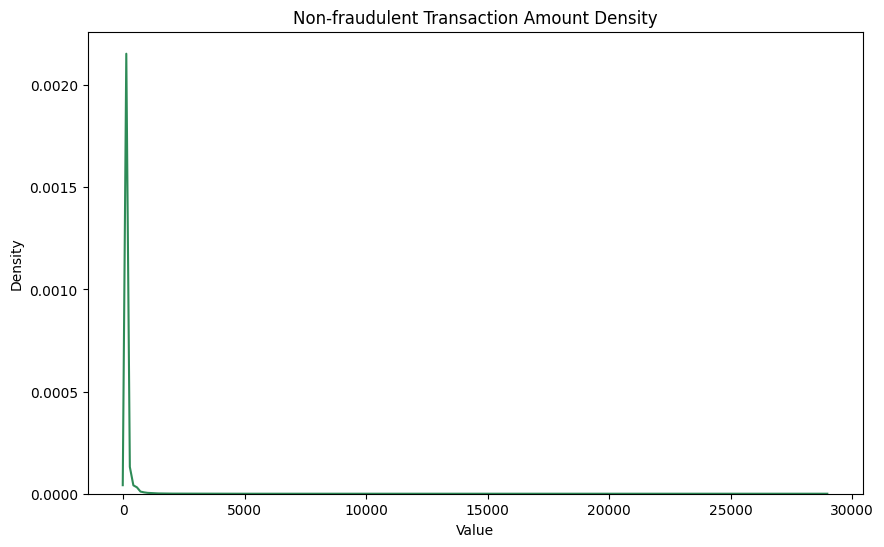

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['is_fraud'] == 0]['amt'], color = '#2E8B57')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Non-fraudulent Transaction Amount Density')
plt.show()

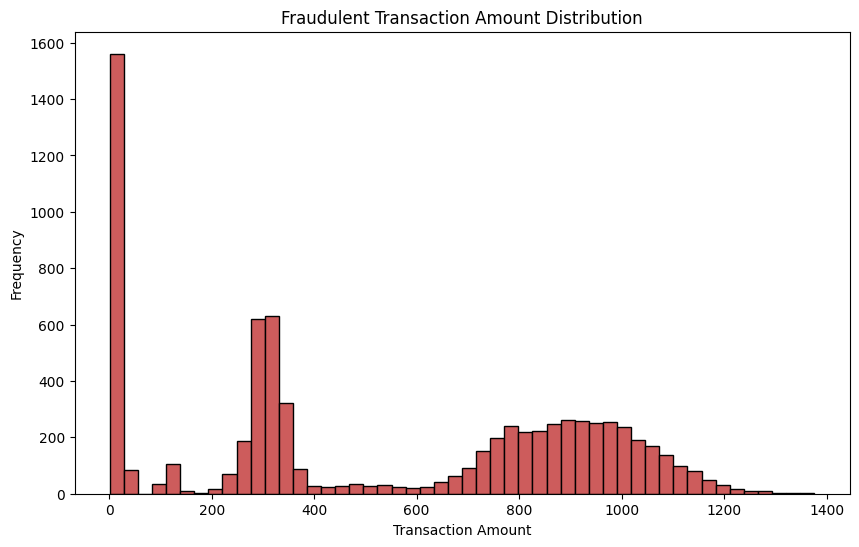

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['is_fraud'] == 1]['amt'], bins = 50, edgecolor = '#000000', color = '#CD5C5C')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Fraudulent Transaction Amount Distribution')
plt.show()

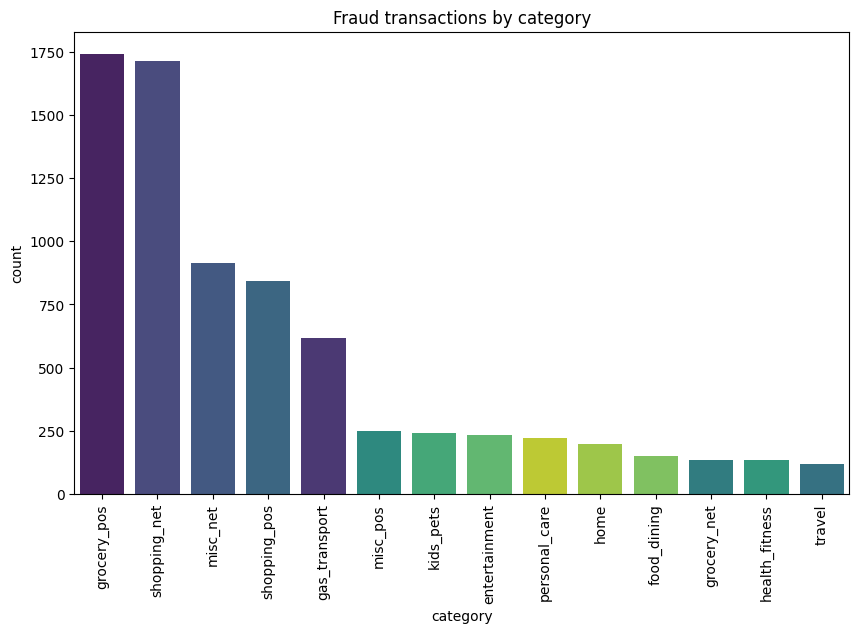

In [ ]:
#Fraud transactions by category
import seaborn as sns
import matplotlib.pyplot as plt

category_order = df[df['is_fraud'] == 1]['category'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df[df['is_fraud'] == 1], order=category_order, palette='viridis', hue='category', legend=False)
plt.xticks(rotation=90)
plt.title('Fraud transactions by category')
plt.show()
#grocery and shopping most popular categories where fraudulent transactions are found

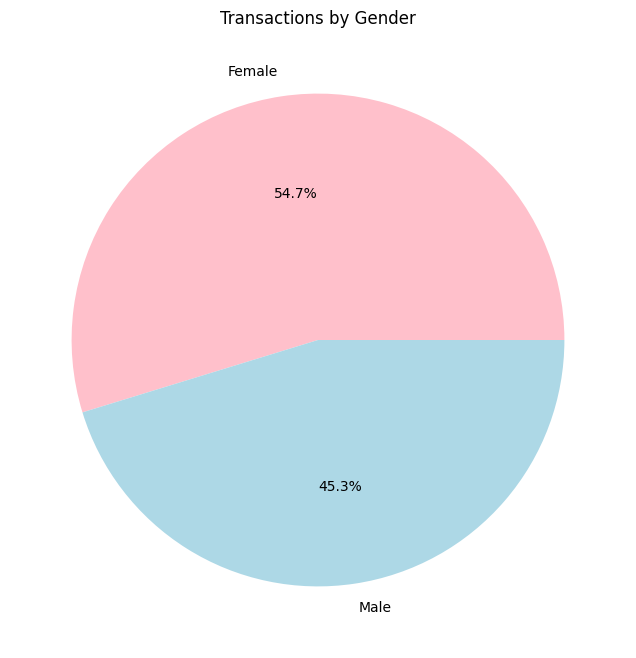

In [ ]:
#Gender distribution
plt.figure(figsize = (10, 8))
transactions_by_gender = df['gender'].value_counts()
plt.pie(transactions_by_gender, labels = ['Female', 'Male'], autopct="%0.1f%%", colors = ['pink', 'lightblue'])
plt.title('Transactions by Gender')
plt.show()
#distribution is good, no further modifications are needed

**Encoding**

In [ ]:
#Convert categorical values to numerical values

lencoder=LabelEncoder()
def label_encode(data):
    data['merchant']=lencoder.fit_transform(data['merchant'])
    data["job"] = lencoder.fit_transform(data["job"])
    data["category"] = lencoder.fit_transform(data["category"])
    return data


In [ ]:
#Convert categorical values to numerical values

ohencoder = OneHotEncoder(sparse=True)
def one_hot_encode(data, columns, column_prefixes=None):

    # Fit and transform categorical columns
    encoded_features = ohencoder.fit_transform(data[columns])

    # Retrieve feature names from the categories_ attribute
    feature_names = ohencoder.get_feature_names_out(columns)

    # Convert the encoded features to a DataFrame with feature names
    encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_features, columns=feature_names)

    # Rename new columns if column_prefixes is provided
    if column_prefixes:
        encoded_df = encoded_df.rename(columns=column_prefixes)

    # Drop the original categorical columns from the DataFrame
    data = data.drop(columns=columns)

    # Concatenate the original DataFrame with the encoded DataFrame
    data_encoded = pd.concat([data.reset_index(drop=True), encoded_df], axis=1)

    return data_encoded

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy = label_encode(df_copy)

In [ ]:
columns_to_encode = ['gender']

column_prefixes = {'gender': 'encoded_gender_'}

df_copy = one_hot_encode(df_copy, columns=columns_to_encode, column_prefixes=column_prefixes)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.head()

,merchant,category,amt,gender,zip,city_pop,job,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,3495,"Psychologist, counselling",36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,149,Special educational needs teacher,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,83252,4154,Nature conservation officer,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,1939,Patent attorney,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,24433,99,Dance movement psychotherapist,38.674999,-78.632459,0


In [ ]:
df_copy.head()

,merchant,category,amt,zip,city_pop,job,merch_lat,merch_long,is_fraud,gender_F,gender_M
0,514,8,4.97,28654,3495,370,36.011293,-82.048315,0,1.0,0.0
1,241,4,107.23,99160,149,428,49.159047,-118.186462,0,1.0,0.0
2,390,0,220.11,83252,4154,307,43.150704,-112.154481,0,0.0,1.0
3,360,2,45.00,59632,1939,328,47.034331,-112.561071,0,0.0,1.0
4,297,9,41.96,24433,99,116,38.674999,-78.632459,0,0.0,1.0


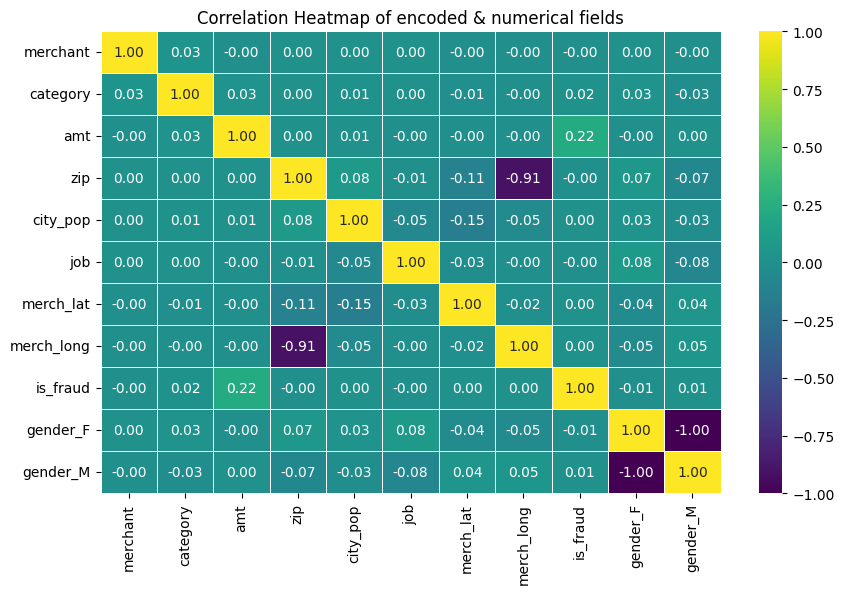

In [ ]:
# Calculate correlation matrix
correlation_matrix = df_copy.corr()

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of encoded & numerical fields')
plt.show()


In [ ]:
fraud_correlation = correlation_matrix['is_fraud'].abs().sort_values(ascending=False)
print(fraud_correlation)

is_fraud      1.000000
amt           0.219404
category      0.020205
gender_M      0.007642
gender_F      0.007642
zip           0.002162
city_pop      0.002136
merch_lat     0.001741
merch_long    0.001721
merchant      0.000536
job           0.000093
Name: is_fraud, dtype: float64


In [ ]:
#Target value
X=df_copy.drop(columns=['is_fraud'])
y=df_copy['is_fraud']

In [ ]:
# Normalization

X_normalized = MinMaxScaler().fit_transform(X)
pd.DataFrame(X_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9
0,0.742775,0.615385,0.000137,0.278069,0.001194,0.750507,0.350302,0.848602,1.0,0.0
1,0.348266,0.307692,0.003670,0.993677,0.000043,0.868154,0.621488,0.486208,1.0,0.0
2,0.563584,0.000000,0.007569,0.832217,0.001421,0.622718,0.497559,0.546697,0.0,1.0
3,0.520231,0.153846,0.001520,0.592483,0.000659,0.665314,0.577663,0.542619,0.0,1.0
4,0.429191,0.692308,0.001415,0.235227,0.000026,0.235294,0.405244,0.882857,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1296670,0.721098,0.000000,0.000503,0.847269,0.000081,0.436105,0.367421,0.551347,0.0,1.0
1296671,0.002890,0.076923,0.001751,0.208402,0.000026,0.730223,0.410026,0.886727,0.0,1.0
1296672,0.865607,0.076923,0.003625,0.883706,0.000301,0.624746,0.300969,0.617133,0.0,1.0
1296673,0.735549,0.076923,0.002553,0.573443,0.000379,0.983773,0.490098,0.636080,0.0,1.0


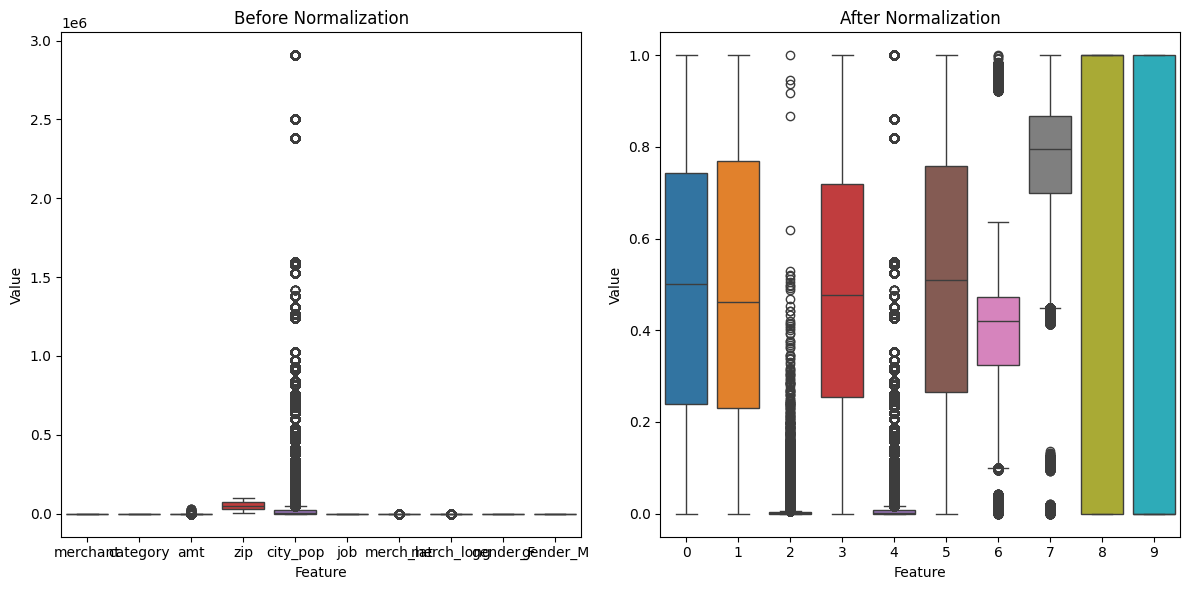

In [ ]:
# Plot before normalization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X)
plt.title('Before Normalization')
plt.xlabel('Feature')
plt.ylabel('Value')


# Plot after normalization
plt.subplot(1, 2, 2)
sns.boxplot(data=X_normalized)
plt.title('After Normalization')
plt.xlabel('Feature')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
#Select optimal subset to keep the top 50% of features

selector = SelectPercentile(score_func=r_regression, percentile=40)
X_selection = selector.fit_transform(X_normalized, y)

In [ ]:

selected_mask = selector.get_support()

# Get the names of selected features
selected_features = pd.DataFrame(X_normalized).columns[selected_mask]

# Print or display the selected feature names
print("Selected features:", selected_features)


Selected features: Index([1, 2, 4, 9], dtype='int64')


In [ ]:
X_selection

array([[6.15384615e-01, 1.37142936e-04, 1.19449117e-03, 0.00000000e+00],
       [3.07692308e-01, 3.66969625e-03, 4.33484697e-05, 0.00000000e+00],
       [0.00000000e+00, 7.56911555e-03, 1.42121054e-03, 1.00000000e+00],
       ...,
       [7.69230769e-02, 3.62478798e-03, 3.01375075e-04, 1.00000000e+00],
       [7.69230769e-02, 2.55286221e-03, 3.79471128e-04, 1.00000000e+00],
       [7.69230769e-02, 1.13997907e-04, 6.70869175e-05, 1.00000000e+00]])

#Resampling for the Imbalanced Data


##Splitting should be applied first

In [ ]:
# train, test split
#X_train,X_test,y_train,y_test=train_test_split(X_selection,y,test_size=0.2,random_state=42)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#pd.DataFrame(X_train)

In [ ]:
# Combine selected features and target variable into a DataFrame
df = pd.DataFrame(X_selection, columns=selected_features)
df['is_fraud']= y

# Print the DataFrame
print(df)

                1         2         4    9  is_fraud
0        0.615385  0.000137  0.001194  0.0         0
1        0.307692  0.003670  0.000043  0.0         0
2        0.000000  0.007569  0.001421  1.0         0
3        0.153846  0.001520  0.000659  1.0         0
4        0.692308  0.001415  0.000026  1.0         0
...           ...       ...       ...  ...       ...
1296670  0.000000  0.000503  0.000081  1.0         0
1296671  0.076923  0.001751  0.000026  1.0         0
1296672  0.076923  0.003625  0.000301  1.0         0
1296673  0.076923  0.002553  0.000379  1.0         0
1296674  0.076923  0.000114  0.000067  1.0         0

[1296675 rows x 5 columns]


In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, stratify=df.is_fraud,random_state = 42)


In [ ]:
train.shape, test.shape

((1037340, 5), (259335, 5))

<Axes: title={'center': 'Verifying that class distribution in train set is same as input data'}, xlabel='is_fraud'>

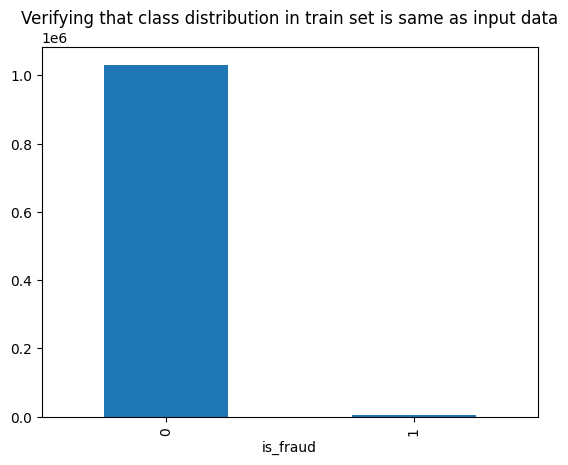

In [ ]:
train.pivot_table(index='is_fraud', aggfunc='size').plot(kind='bar', title='Verifying that class distribution in train set is same as input data')

<Axes: title={'center': 'Verify that class distribution in test set is same as input data'}, xlabel='is_fraud'>

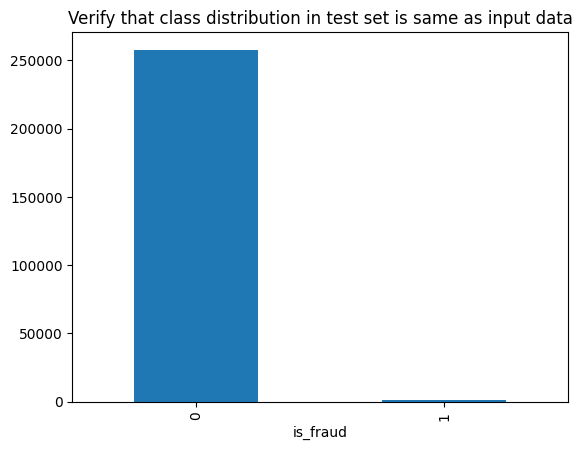

In [ ]:
test.pivot_table(index='is_fraud', aggfunc='size').plot(kind='bar', title='Verify that class distribution in test set is same as input data')

**Hybrid Sampling**

In [ ]:
#Target value
X_train = train.drop(columns=['is_fraud'])
y_train = train['is_fraud']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

# Determine the desired number of samples to remove from the majority class
desired_majority_samples = 50000  # Adjust this value as needed

# Calculate the sampling ratio for undersampling the majority class
majority_sampling_ratio = (len(y_train) - desired_majority_samples) / len(y_train)

# Define the hybrid sampling pipeline with a fixed number of samples to remove from the majority class
hybrid_sampling_pipeline = Pipeline([
    ('over_sampler', RandomOverSampler(sampling_strategy=0.8)),  # Oversample the minority class
    ('under_sampler', RandomUnderSampler(sampling_strategy=majority_sampling_ratio)),  # Undersample the majority class
])

# Apply hybrid sampling to the dataset
X_hybrid, y_hybrid = hybrid_sampling_pipeline.fit_resample(X_train, y_train)

# Concatenate resampled features and target variable into a DataFrame
df_hybrid_resampled = pd.concat([pd.DataFrame(X_hybrid, columns=X_train.columns), pd.DataFrame(y_hybrid, columns=['is_fraud'])], axis=1)

# Shuffle the resampled DataFrame to randomize the order of instances
df_hybrid_resampled = df_hybrid_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Now df_resampled contains a balanced dataset with adjusted class ratios


In [ ]:
#Dataset is now balanced
fraud_trans_count = (df_hybrid_resampled['is_fraud'] == 1).sum()
valid_trans_count = (df_hybrid_resampled['is_fraud'] == 0).sum()

print("Number of fraud transactions:", fraud_trans_count)
print("Number of valid transactions:", valid_trans_count)

Number of fraud transactions: 825068
Number of valid transactions: 866850


<Figure size 1000x600 with 0 Axes>

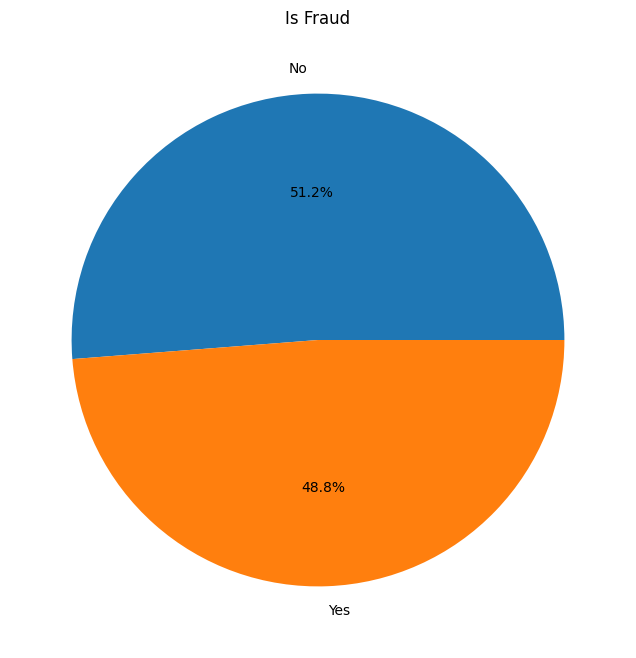

In [ ]:
#Proportion of fraudulent-non-fraudulent transactions
plt.figure(figsize = (10, 6))
is_fraud_count = df_hybrid_resampled['is_fraud'].value_counts()
plt.figure(figsize = (12, 8))
plt.pie(is_fraud_count, labels = ['No', 'Yes'], autopct="%0.1f%%")
plt.title('Is Fraud')
plt.show()
#Conclusion: after undersampling by fraud transaction number it got balanced.

##Model Training and Evaluation

In [ ]:
# Initialize Random Forest classifier
#X_train_resampled_df = pd.DataFrame(X_train, columns=X_train.columns)
#X_train_selected = X_train_resampled_df[['amt', 'merch_long', 'merchant_enc', 'category_enc', 'job_enc']]

#rf_rfe = rf_classifier.fit(X_train_selected, y_train_resampled)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X_resampled = df_hybrid_resampled.drop(columns=['is_fraud'])
y_resampled = df_hybrid_resampled['is_fraud']


In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the data
rf_classifier.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
X_test = test.drop(columns=['is_fraud'])
y_test = test['is_fraud']

In [ ]:
# Predict on the training data
y_pred = rf_classifier.predict(X_test)


In [ ]:
# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[257353    481]
 [   428   1073]]


<Axes: >

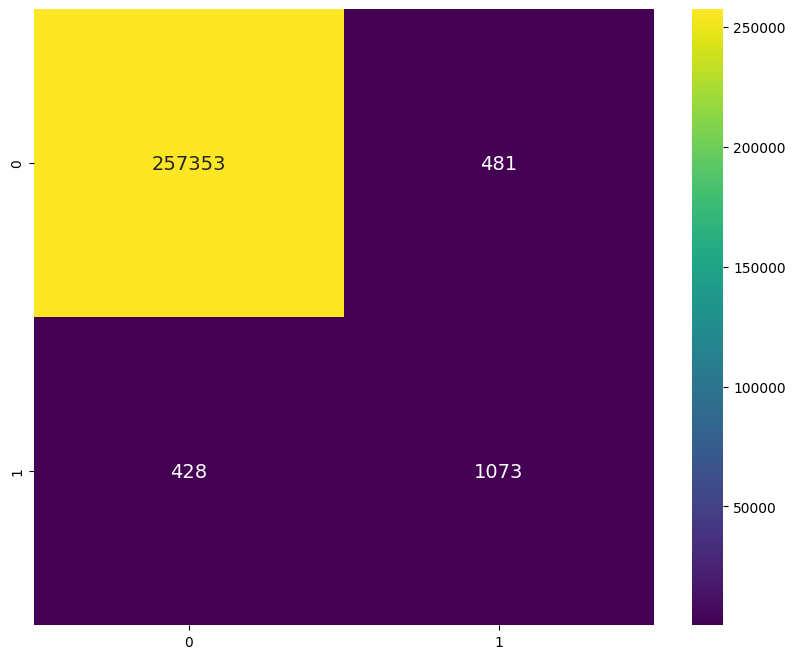

In [ ]:
fig = plt.figure(figsize=(10,8))
cfs_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))
#we get this with oversampling prop = 0.2
#Random Forest Results

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.69      0.71      0.70      1501

    accuracy                           1.00    259335
   macro avg       0.84      0.86      0.85    259335
weighted avg       1.00      1.00      1.00    259335



In [ ]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred)

print("AUC Score:", auc_score)

AUC Score: 0.856495610381855


In [ ]:
# Define an instance you want to predict
#instance = X_test.iloc[1]  # Assuming the second instance in your test set

# Create a DataFrame with the selected features and the target variable 'is_fraud'
df_instance = pd.DataFrame(X_test.iloc[1][selected_features]).T
df_instance['is_fraud'] = y_test.iloc[1]  # Assuming the true target for the second instance

# Print the DataFrame
print(df_instance)


               1         2         4    9  is_fraud
192923  0.153846  0.002344  0.011993  0.0         0


In [ ]:
instance = X_test.iloc[1]

# Reshape the instance to match the expected input format for prediction (if needed)
instance = instance.values.reshape(1, -1)  # Reshape to a single-row 2D array

# Use the trained classifier to make predictions
prediction = rf_classifier.predict(instance)

# Get the true target for the instance
true_target =  y_test.iloc[1]  # Assuming the target corresponding to the first instance

# Print the prediction and true target
print("Prediction:", prediction)
print("True Target:", true_target)


Prediction: [0]
True Target: 0
